INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/wilhelm_dsa.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.
INFO: Intermediate results will be cached in: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/
INFO: --- Starting Scintillation Pipeline for wilhelm ---
INFO: Noise modelling disabled by config.
INFO: Loading and processing raw data...
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/wilhelm.npz
INFO: Initializing DynamicSpectrum object.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "wilhelm",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/wilhelm.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "padding_factor": 0.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 3,
      "max_lag_mhz": 200.0,
      "use_snr_subbanding": false,
      "enable_intra_pulse_analysis": true,
      "intra_pulse_time_bins": 5
    

INFO: Spectrum shape: (6144, 2500)
INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 76 to 78.
Iterative RFI Masking in Frequency Domain:  20%|██        | 1/5 [00:00<00:00, 82.44it/s]
INFO: Masked 5 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying polynomial baseline subtraction...
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Performing order-1 polynomial baseline subtraction using off-pulse spectrum.
INFO: Baseline subtraction complete.
INFO: Initializin

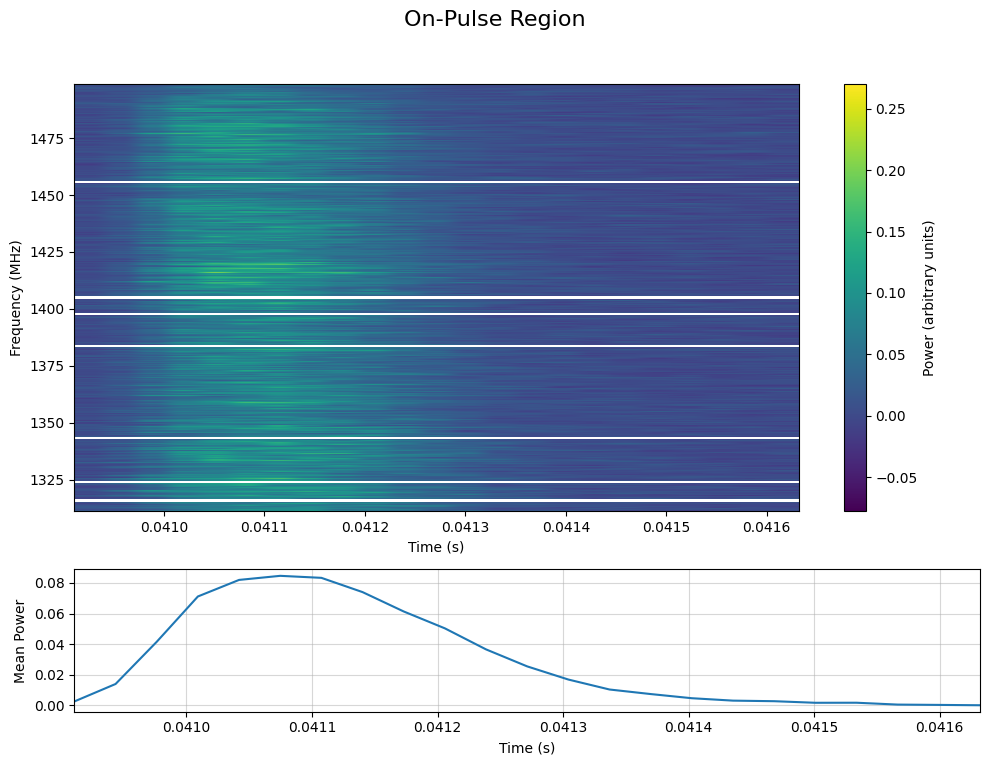

INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 1048)
INFO: Generating diagnostic plot: Off-Pulse (Noise) Region
INFO: Diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/wilhelm_off_pulse_diagnostic.png


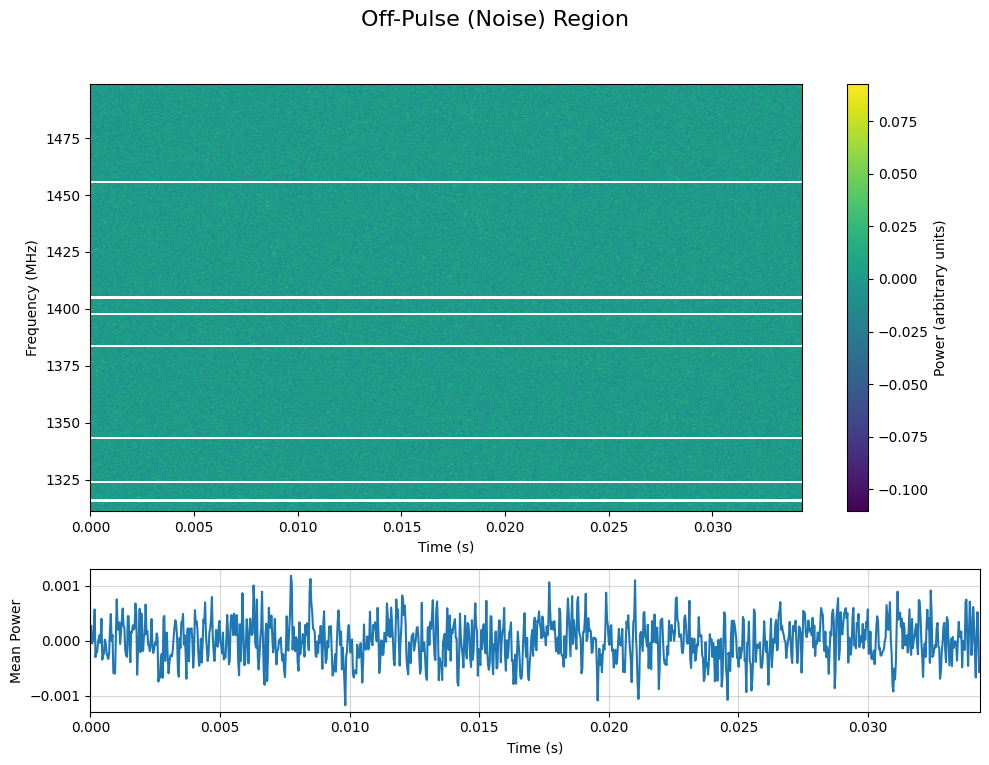

INFO: On/Off pulse diagnostic plots saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics
INFO: Generating baseline fit diagnostic plot.
INFO: Generating baseline fit diagnostic plot.
INFO: Baseline diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/wilhelm_baseline_diagnostic.png


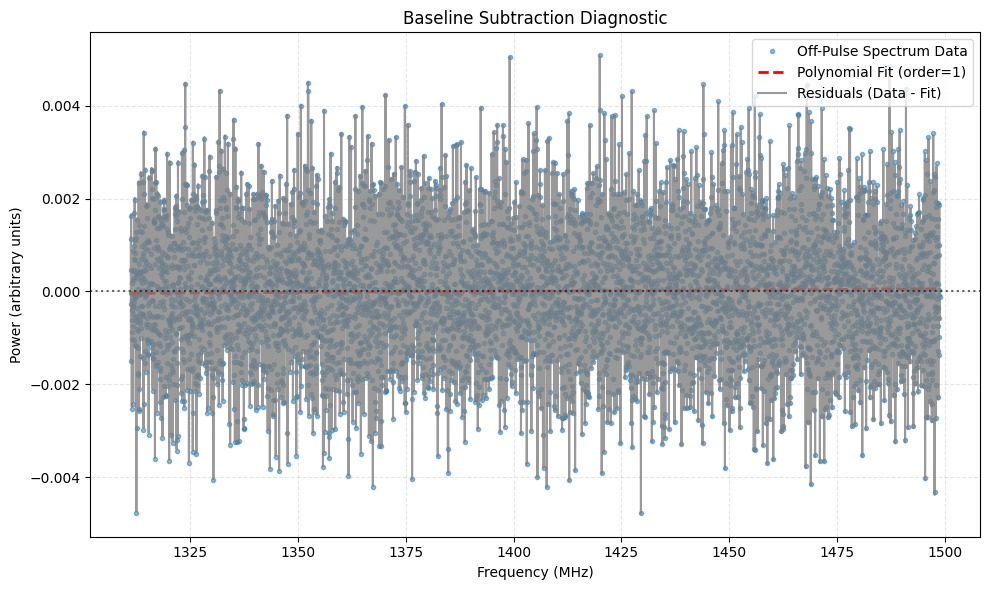

INFO: Characterizing off-pulse noise...
/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO: Noise characterization complete. Detected kind: 'flux_shiftedgamma'
INFO: Calculating ACFs for all sub-bands...
INFO: Starting sub‑band ACF calculations (self‑noise + synthetic‑noise aware).
ACF per sub‑band: 100%|██████████| 3/3 [00:00<00:00, 13.23it/s]
INFO: Saved ACF results to cache: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/wilhelm_acf_results.pkl
INFO: 'halt_after_acf' is set to True. Halting pipeline as requested.
INFO: ACF results are calculated an

--- Pipeline Execution Finished ---


In [63]:
# Set path for module imports
import sys
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

# Run this cell to import necessary libraries
import json
import yaml
import pickle
import logging
import numpy as np
import matplotlib.pyplot as plt

# --- Bokeh Imports for Jupyter (Corrected) ---
from bokeh.io import output_notebook, show
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, Slider, Div
from bokeh.plotting import figure
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler
# --- Imports for the new interactive framework ---
import plotly.graph_objects as go
from ipywidgets import Dropdown, FloatSlider, Label, VBox, HBox, Output, Button, Textarea
from IPython.display import display

# --- Your Pipeline's Imports ---
# Make sure your scint_analysis package is importable
# (You may need to add its path using sys.path.insert)
try:
    from scint_analysis import config, pipeline, plotting
    from scint_analysis.analysis import lorentzian_model_3_comp, lorentzian_model_2_comp, lorentzian_model_1_comp
    from scint_analysis.core import ACF
    from scint_analysis.config import update_fitting_parameter, update_pipeline_parameter, update_yaml_guesses
except ImportError as e:
    logging.error(f"Could not import scint_analysis. Make sure it's in your Python path. {e}")

# --- 1. Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/wilhelm_dsa.yaml'

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")
    # Stop execution if config fails
    raise

# --- 2. Initialize and Run the Pipeline ---
print("\n--- Initializing and Running Scintillation Pipeline ---")
# Create an instance of the main pipeline controller
scint_pipeline = pipeline.ScintillationAnalysis(analysis_config)

# This single .run() call executes all the steps in the correct order:
# - Loads and masks data
# - Characterizes off-pulse noise (NEW)
# - Calculates ACFs using the noise model for normalization
scint_pipeline.run()
print("--- Pipeline Execution Finished ---")

In [20]:
# ==============================================================================
# Manual ACF Fitting Notebook
# ==============================================================================
# This notebook allows for manual, interactive fitting of sub-banded ACFs
# independent of the main automated pipeline.

# --- Cell 1: Imports ---
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Imports for Interactive Controls ---
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, VBox, HBox, Button, Output, Textarea
from IPython.display import display

# --- Imports from your Scintillation Analysis Pipeline ---
# Ensure the scint_analysis package is in your Python path
try:
    from scint_analysis.analysis import (
        lorentzian_model_1_comp,
        lorentzian_model_2_comp,
        lorentzian_model_3_comp
    )
    from scint_analysis.core import ACF
except ImportError as e:
    print(f"Error: Could not import from scint_analysis package. Make sure it is installed or in the Python path. {e}")

# --- Cell 2: Load Pre-Calculated ACF Data ---
ACF_RESULTS_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/wilhelm_acf_results.pkl' # Adjust this path if necessary

try:
    with open(ACF_RESULTS_PATH, 'rb') as f:
        acf_results = pickle.load(f)
    print(f"Successfully loaded ACF results from '{ACF_RESULTS_PATH}'")
    num_subbands = len(acf_results['subband_acfs'])
    print(f"Found data for {num_subbands} sub-bands.")
except FileNotFoundError:
    print(f"ERROR: ACF results file not found at '{ACF_RESULTS_PATH}'.")
    print("Please run the main pipeline with 'save_intermediate_steps: true' and 'halt_after_acf: true' to generate it.")
    acf_results = None

# --- Cell 3: Model Configuration Hub ---
# This dictionary maps model names to their functions and parameter details.
MODEL_CONFIG = {
    '1-Component Lorentzian': {
        'func': lorentzian_model_1_comp,
        'param_names': ['gamma1', 'm1', 'c1'],
        'bounds': ([-np.inf, 0, -np.inf], [np.inf, np.inf, np.inf])
    },
    '2-Component Lorentzian': {
        'func': lorentzian_model_2_comp,
        'param_names': ['gamma1', 'm1', 'gamma2', 'm2', 'c2'],
        'bounds': ([-np.inf, 0, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
    },
    '3-Component Lorentzian': {
        'func': lorentzian_model_3_comp,
        'param_names': ['gamma1', 'm1', 'gamma2', 'm2', 'gamma3', 'm3', 'c3'],
        'bounds': ([-np.inf, 0, -np.inf, 0, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    }
}


# --- Cell 4: Main Interactive Fitting Function ---
if acf_results:
    # --- Create Widgets ---
    subband_slider = IntSlider(min=0, max=num_subbands-1, step=1, value=0, description='Sub-band Index:')
    model_selector = Dropdown(options=MODEL_CONFIG.keys(), value='2-Component Lorentzian', description='Model:')
    fit_button = Button(description="Perform Fit", button_style='success', icon='cogs')
    print_fits_button = Button(description="Print All Fit Results", button_style='info', icon='print') # NEW
    param_sliders_container = VBox([])
    plot_output = Output()
    results_output_area = Textarea(layout={'width': '98%', 'height': '200px'}) # NEW

    # --- In-memory storage for the fit results ---
    all_fits_storage = {}

    def create_param_sliders(model_name):
        config = MODEL_CONFIG[model_name]
        param_names = config['param_names']
        sliders = [FloatSlider(min=0, max=20, step=0.01, value=0.1, description=p) for p in param_names]
        param_sliders_container.children = tuple(sliders)
        for s in sliders:
            s.observe(on_visuals_change, names='value')

    def draw_plot(subband_idx, model_name, initial_guesses, popt=None):
        with plot_output:
            plot_output.clear_output(wait=True)
            config = MODEL_CONFIG[model_name]
            model_func = config['func']
            
            # Extract data and frequency for the selected sub-band
            center_freq = acf_results['subband_center_freqs_mhz'][subband_idx]
            lags = acf_results['subband_lags_mhz'][subband_idx]
            acf_data = acf_results['subband_acfs'][subband_idx]
            acf_err = acf_results.get('subband_acfs_err', [None]*num_subbands)[subband_idx]
            fit_mask = (lags != 0)
            x_data, y_data, sigma = lags[fit_mask], acf_data[fit_mask], acf_err[fit_mask] if acf_err is not None else None

            fig, ax = plt.subplots(figsize=(10, 6))
            ax.errorbar(x_data, y_data, yerr=sigma, fmt='o', label=f'ACF Data (sub-band {subband_idx})', capsize=3, alpha=0.6, zorder=1)
            y_guess = model_func(x_data, *initial_guesses)
            ax.plot(x_data, y_guess, 'r--', label='Initial Guess', zorder=5)

            if popt is not None:
                y_fit = model_func(x_data, *popt)
                ax.plot(x_data, y_fit, 'k-', label='Final Fit', lw=2, zorder=10)

            # MODIFIED: Include center frequency in the title
            ax.set_title(f"Manual Fit for Sub-band {subband_idx} @ {center_freq:.2f} MHz ({model_name})")
            ax.set_xlabel("Frequency Lag (MHz)")
            ax.set_ylabel("Correlation")
            ax.grid(True, linestyle=':')
            ax.legend()
            plt.show()

    def on_visuals_change(change):
        subband_idx = subband_slider.value
        model_name = model_selector.value
        initial_guesses = [s.value for s in param_sliders_container.children]
        draw_plot(subband_idx, model_name, initial_guesses)

    def on_fit_button_clicked(b):
        subband_idx = subband_slider.value
        model_name = model_selector.value
        initial_guesses = [s.value for s in param_sliders_container.children]
        config = MODEL_CONFIG[model_name]
        model_func, bounds = config['func'], config['bounds']
        
        lags = acf_results['subband_lags_mhz'][subband_idx]
        acf_data = acf_results['subband_acfs'][subband_idx]
        acf_err = acf_results.get('subband_acfs_err', [None]*num_subbands)[subband_idx]
        fit_mask = (lags != 0)
        x_data, y_data, sigma = lags[fit_mask], acf_data[fit_mask], acf_err[fit_mask] if acf_err is not None else None
        
        popt, pcov = None, None
        try:
            popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guesses, sigma=sigma, bounds=bounds, maxfev=5000)
            # NEW: Store the successful fit results
            all_fits_storage[subband_idx] = {'popt': popt, 'pcov': pcov, 'model_name': model_name}
        except RuntimeError:
            print("Fit failed to converge. Try different initial guesses.")
        except ValueError as e:
            print(f"Fit failed due to a value error: {e}")
        
        draw_plot(subband_idx, model_name, initial_guesses, popt=popt)

    # NEW: Callback for the "Print All Fits" button
    def on_print_fits_clicked(b):
        output_str = ""
        sorted_indices = sorted(all_fits_storage.keys())
        for idx in sorted_indices:
            fit_info = all_fits_storage[idx]
            model_name = fit_info['model_name']
            popt = fit_info['popt']
            pcov = fit_info['pcov']
            
            # Calculate 1-sigma uncertainties from the covariance matrix
            perr = np.sqrt(np.diag(pcov))
            
            center_freq = acf_results['subband_center_freqs_mhz'][idx]
            param_names = MODEL_CONFIG[model_name]['param_names']
            
            output_str += f"--- Sub-band {idx} @ {center_freq:.2f} MHz (Model: {model_name}) ---\n"
            for name, val, err in zip(param_names, popt, perr):
                output_str += f"  {name}: {val:.4f} +/- {err:.4f}\n"
            output_str += "\n"
        
        results_output_area.value = output_str

    # --- Link Widgets to Functions ---
    def on_model_change(change):
        create_param_sliders(change['new'])
        on_visuals_change(None)

    subband_slider.observe(on_visuals_change, names='value')
    model_selector.observe(on_model_change, names='value')
    fit_button.on_click(on_fit_button_clicked)
    print_fits_button.on_click(on_print_fits_clicked) # NEW

    # --- Display Dashboard ---
    create_param_sliders(model_selector.value)
    # MODIFIED: Add new widgets to the layout
    dashboard = VBox([
        HBox([subband_slider, model_selector]),
        param_sliders_container,
        HBox([fit_button, print_fits_button]),
        plot_output,
        results_output_area
    ])
    display(dashboard)
    
    on_visuals_change(None)



Successfully loaded ACF results from '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/wilhelm_acf_results.pkl'
Found data for 4 sub-bands.


In [85]:
# ==============================================================================
# Manual ACF Fitting Notebook
# ==============================================================================
# This notebook allows for manual, interactive fitting of sub-banded ACFs
# independent of the main automated pipeline.

# --- Cell 1: Imports ---
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Imports for Interactive Controls ---
from ipywidgets import interact, IntSlider, FloatSlider, FloatRangeSlider, FloatText, Dropdown, VBox, HBox, Button, Output, Textarea, Label
from IPython.display import display

# --- Imports from your Scintillation Analysis Pipeline ---
# Ensure the scint_analysis package is in your Python path
try:
    from scint_analysis.analysis import (
        lorentzian_model_1_comp,
        lorentzian_model_2_comp,
        lorentzian_model_3_comp
    )
    from scint_analysis.core import ACF
except ImportError as e:
    print(f"Error: Could not import from scint_analysis package. Make sure it is installed or in the Python path. {e}")

# --- Cell 2: Load Pre-Calculated ACF Data ---
ACF_RESULTS_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/wilhelm_acf_results.pkl' # # Adjust this path if necessary

try:
    with open(ACF_RESULTS_PATH, 'rb') as f:
        acf_results = pickle.load(f)
    print(f"Successfully loaded ACF results from '{ACF_RESULTS_PATH}'")
    num_subbands = len(acf_results['subband_acfs'])
    print(f"Found data for {num_subbands} sub-bands.")
except FileNotFoundError:
    print(f"ERROR: ACF results file not found at '{ACF_RESULTS_PATH}'.")
    print("Please run the main pipeline with 'save_intermediate_steps: true' and 'halt_after_acf: true' to generate it.")
    acf_results = None

# --- Cell 3: Model Configuration Hub ---
# This dictionary maps model names to their functions and parameter details.
MODEL_CONFIG = {
    '1-Component Lorentzian': {
        'func': lorentzian_model_1_comp,
        'param_names': ['gamma1', 'm1', 'c1'],
        'bounds': ([-np.inf, 0, -np.inf], [np.inf, np.inf, np.inf])
    },
    '2-Component Lorentzian': {
        'func': lorentzian_model_2_comp,
        'param_names': ['gamma1', 'm1', 'gamma2', 'm2', 'c2'],
        'bounds': ([-np.inf, 0, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
    },
    '3-Component Lorentzian': {
        'func': lorentzian_model_3_comp,
        'param_names': ['gamma1', 'm1', 'gamma2', 'm2', 'gamma3', 'm3', 'c3'],
        'bounds': ([-np.inf, 0, -np.inf, 0, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    }
}


# --- Cell 4: Main Interactive Fitting Function ---
if acf_results:
    # --- Create Widgets ---
    subband_slider = IntSlider(min=0, max=num_subbands-1, step=1, value=0, description='Sub-band Index:')
    model_selector = Dropdown(options=MODEL_CONFIG.keys(), value='2-Component Lorentzian', description='Model:')
    
    max_lag_overall = max(np.max(np.abs(lags)) for lags in acf_results['subband_lags_mhz'])
    
    # NEW: Create text boxes for manual entry of the fit range
    fit_range_min_text = FloatText(value=-max_lag_overall, description='Min Lag:')
    fit_range_max_text = FloatText(value=max_lag_overall, description='Max Lag:')
    
    fit_range_slider = FloatRangeSlider(
        value=[-max_lag_overall, max_lag_overall],
        min=-max_lag_overall,
        max=max_lag_overall,
        step=0.1,
        description='Fit Lag Range (MHz):',
        continuous_update=False, # Only update when mouse is released
        style={'description_width': 'initial'}
    )

    fit_button = Button(description="Perform Fit", button_style='success', icon='cogs')
    print_fits_button = Button(description="Print All Fit Results", button_style='info', icon='print')
    param_sliders_container = VBox([])
    plot_output = Output()
    results_output_area = Textarea(layout={'width': '98%', 'height': '200px'})

    # --- In-memory storage for the fit results ---
    all_fits_storage = {}

    def create_param_sliders(model_name):
        config = MODEL_CONFIG[model_name]
        param_names = config['param_names']
        sliders = [FloatSlider(min=0, max=20, step=0.01, value=0.5, description=p) for p in param_names]
        param_sliders_container.children = tuple(sliders)
        for s in sliders:
            s.observe(on_visuals_change, names='value')

    def draw_plot(subband_idx, model_name, fit_range, initial_guesses, popt=None):
        with plot_output:
            plot_output.clear_output(wait=True)
            config = MODEL_CONFIG[model_name]
            model_func = config['func']
            
            center_freq = acf_results['subband_center_freqs_mhz'][subband_idx]
            lags = acf_results['subband_lags_mhz'][subband_idx]
            acf_data = acf_results['subband_acfs'][subband_idx]
            acf_err = acf_results.get('subband_acfs_err', [None]*num_subbands)[subband_idx]
            
            # MODIFIED: Combine masks
            zero_lag_mask = (lags != 0)
            range_mask = (lags >= fit_range[0]) & (lags <= fit_range[1])
            final_fit_mask = zero_lag_mask & range_mask
            
            x_data, y_data, sigma = lags[final_fit_mask], acf_data[final_fit_mask], acf_err[final_fit_mask] if acf_err is not None else None

            fig, ax = plt.subplots(figsize=(10, 6))
            # Plot all data points, but highlight the fit region
            ax.errorbar(lags, acf_data, yerr=acf_err, fmt='.', color='lightgray', label='All Data', capsize=3, alpha=0.2, zorder=1)
            ax.plot(x_data, y_data, 'o', color='purple', alpha=0.2, label='Data in Fit Range')
            
            # NEW: Add a shaded region to show the fitting range
            ax.axvspan(fit_range[0], fit_range[1], color='gray', alpha=0.15, zorder=0)

            y_guess = model_func(x_data, *initial_guesses)
            ax.plot(x_data, y_guess, 'r--', label='Initial Guess', zorder=5)

            if popt is not None:
                y_fit = model_func(x_data, *popt)
                ax.plot(x_data, y_fit, 'k-', label='Final Fit', lw=2, zorder=10)

            ax.set_title(f"Manual Fit for Sub-band {subband_idx} @ {center_freq:.2f} MHz ({model_name})")
            ax.set_xlabel("Frequency Lag (MHz)")
            ax.set_ylabel("Correlation")
            ax.set_ylim(-0.05, 0.1)
            ax.set_xlim(-10, 10)
            ax.grid(True, linestyle=':')
            ax.legend()
            plt.show()

    def on_visuals_change(change):
        subband_idx = subband_slider.value
        model_name = model_selector.value
        fit_range = fit_range_slider.value
        initial_guesses = [s.value for s in param_sliders_container.children]
        draw_plot(subband_idx, model_name, fit_range, initial_guesses)

    def on_fit_button_clicked(b):
        subband_idx = subband_slider.value
        model_name = model_selector.value
        fit_range = fit_range_slider.value
        initial_guesses = [s.value for s in param_sliders_container.children]
        config = MODEL_CONFIG[model_name]
        model_func, bounds = config['func'], config['bounds']
        
        lags = acf_results['subband_lags_mhz'][subband_idx]
        acf_data = acf_results['subband_acfs'][subband_idx]
        acf_err = acf_results.get('subband_acfs_err', [None]*num_subbands)[subband_idx]
        
        zero_lag_mask = (lags != 0)
        range_mask = (lags >= fit_range[0]) & (lags <= fit_range[1])
        final_fit_mask = zero_lag_mask & range_mask
        
        x_data, y_data, sigma = lags[final_fit_mask], acf_data[final_fit_mask], acf_err[final_fit_mask] if acf_err is not None else None
        
        popt, pcov = None, None
        try:
            popt, pcov = curve_fit(model_func, x_data, y_data, p0=initial_guesses, sigma=sigma, bounds=bounds, maxfev=5000)
            all_fits_storage[subband_idx] = {'popt': popt, 'pcov': pcov, 'model_name': model_name}
        except RuntimeError:
            print("Fit failed to converge. Try different initial guesses.")
        except ValueError as e:
            print(f"Fit failed due to a value error: {e}")
        
        draw_plot(subband_idx, model_name, fit_range, initial_guesses, popt=popt)

    def on_print_fits_clicked(b):
        output_str = ""
        sorted_indices = sorted(all_fits_storage.keys())
        for idx in sorted_indices:
            fit_info = all_fits_storage[idx]
            model_name = fit_info['model_name']
            popt = fit_info['popt']
            pcov = fit_info['pcov']
            
            perr = np.sqrt(np.diag(pcov))
            center_freq = acf_results['subband_center_freqs_mhz'][idx]
            param_names = MODEL_CONFIG[model_name]['param_names']
            
            output_str += f"--- Sub-band {idx} @ {center_freq:.2f} MHz (Model: {model_name}) ---\n"
            for name, val, err in zip(param_names, popt, perr):
                output_str += f"  {name}: {val:.4f} +/- {err:.4f}\n"
            output_str += "\n"
        
        results_output_area.value = output_str

    def on_model_change(change):
        create_param_sliders(change['new'])
        on_visuals_change(None)
        
    def link_text_to_slider(change):
        # Update slider when text box value changes, preventing inversion
        min_val = fit_range_min_text.value
        max_val = fit_range_max_text.value
        if min_val < max_val:
            fit_range_slider.value = (min_val, max_val)

    def link_slider_to_text(change):
        # Update text boxes when slider value changes
        fit_range_min_text.value = round(change.new[0], 2)
        fit_range_max_text.value = round(change.new[1], 2)
        # Also trigger a visual update
        on_visuals_change(None)

    # --- Link Widgets to Functions ---
    subband_slider.observe(on_visuals_change, names='value')
    model_selector.observe(on_model_change, names='value')
    fit_button.on_click(on_fit_button_clicked)
    print_fits_button.on_click(on_print_fits_clicked)

    # Link the new text and slider widgets
    fit_range_slider.observe(link_slider_to_text, names='value')
    fit_range_min_text.observe(link_text_to_slider, names='value')
    fit_range_max_text.observe(link_text_to_slider, names='value')
    
    # --- Display Dashboard ---
    create_param_sliders(model_selector.value)
    
    # MODIFIED: Create a new layout for the fit range controls
    fit_range_controls = VBox([
        Label(value="Fit Lag Range (MHz):"),
        HBox([fit_range_min_text, fit_range_max_text]),
        fit_range_slider
    ])

    dashboard = VBox([
        HBox([subband_slider, model_selector]),
        fit_range_controls, # Add the new control group
        param_sliders_container,
        HBox([fit_button, print_fits_button]),
        plot_output,
        results_output_area
    ])
    display(dashboard)
    
    on_visuals_change(None)

Successfully loaded ACF results from '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/cache/wilhelm/wilhelm_acf_results.pkl'
Found data for 3 sub-bands.


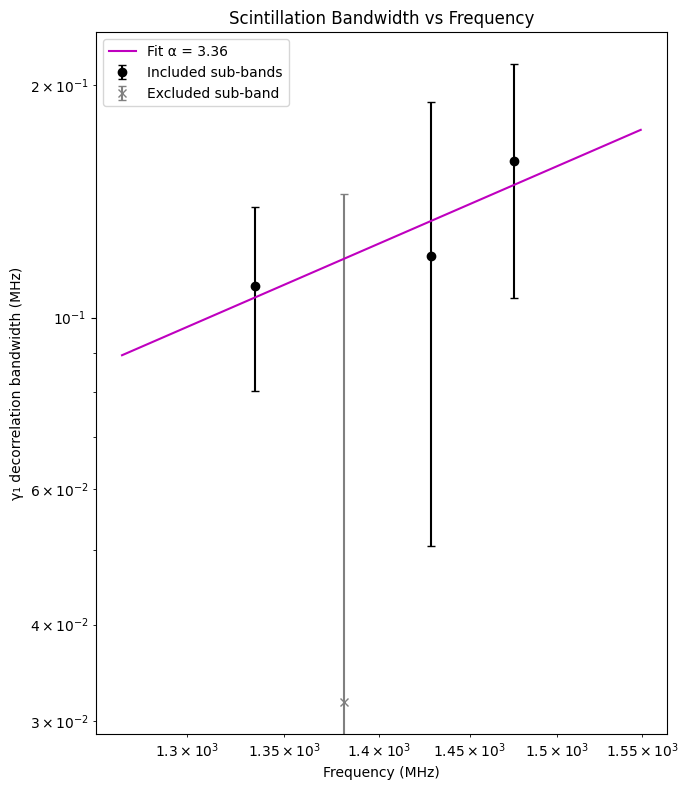

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# γ1 decorrelation bandwidths
freq = np.array([1334.68, 1381.56, 1428.44, 1475.32])  # MHz
gamma = np.array([0.1098, 0.0317, 0.1203, 0.1595])      # MHz
sigma = np.array([0.0294, 0.1130, 0.0698, 0.0536])      # MHz uncertainties

# Mark the band with very low S/N that we exclude from the primary fit
mask = np.array([True, False, True, True])              # exclude sub‑band 1 (1381 MHz)

# Do a log–log linear fit on the retained points
log_nu = np.log10(freq[mask])
log_gamma = np.log10(gamma[mask])
coeffs = np.polyfit(log_nu, log_gamma, 1)
alpha = coeffs[0]
intercept = coeffs[1]

# Plot
fig, ax = plt.subplots(figsize=(7,8))
ax.errorbar(freq[mask], gamma[mask], yerr=sigma[mask],
            fmt='o', capsize=3, label='Included sub‑bands', c='k')
ax.errorbar(freq[~mask], gamma[~mask], yerr=sigma[~mask],
            fmt='x', capsize=3, label='Excluded sub‑band', c='gray')

# Best‑fit power‑law line
nu_fit = np.linspace(freq.min()*0.95, freq.max()*1.05, 200)
gamma_fit = 10**(intercept + alpha*np.log10(nu_fit))
ax.plot(nu_fit, gamma_fit, '-', label=f'Fit α = {alpha:.2f}', c='m')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ₁ decorrelation bandwidth (MHz)')
ax.set_title('Scintillation Bandwidth vs Frequency')
ax.legend()
plt.tight_layout()



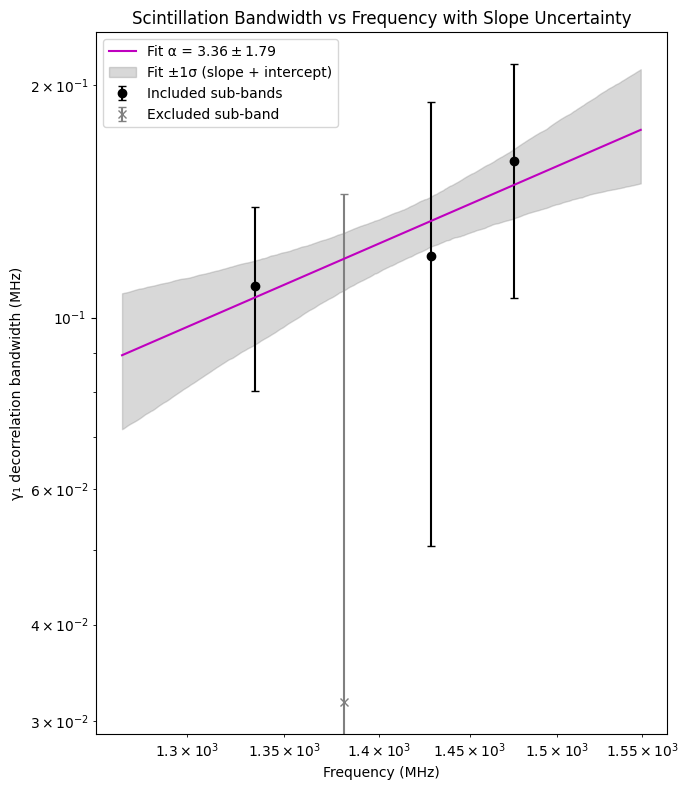

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Data
freq = np.array([1334.68, 1381.56, 1428.44, 1475.32])  # MHz
gamma = np.array([0.1098, 0.0317, 0.1203, 0.1595])      # MHz
sigma = np.array([0.0294, 0.1130, 0.0698, 0.0536])      # MHz uncertainties
mask = np.array([True, False, True, True])              # exclude sub‑band 1

# Log–log fit with covariance matrix
log_nu = np.log10(freq[mask])
log_gamma = np.log10(gamma[mask])
(coeffs, cov) = np.polyfit(log_nu, log_gamma, 1, cov=True)
alpha, intercept = coeffs
alpha_err = np.sqrt(cov[0, 0])
intercept_err = np.sqrt(cov[1, 1])
cov_ai = cov[0, 1]

# Frequencies for plotting fit and ±1 σ envelope
nu_fit = np.linspace(freq.min()*0.95, freq.max()*1.05, 300)
log_nu_fit = np.log10(nu_fit)

# Monte‑Carlo draws to illustrate joint envelope
rng = np.random.default_rng(seed=42)
samples = rng.multivariate_normal(coeffs, cov, size=1000)
log_gamma_draws = samples[:, 0][:, None] * log_nu_fit + samples[:, 1][:, None]
gamma_draws = 10**log_gamma_draws
lower = np.percentile(gamma_draws, 16, axis=0)
upper = np.percentile(gamma_draws, 84, axis=0)
median = 10**(alpha*log_nu_fit + intercept)

fig, ax = plt.subplots(figsize=(7,8))
# Data points
ax.errorbar(freq[mask], gamma[mask], yerr=sigma[mask], fmt='o', capsize=3, c='k',
            label='Included sub‑bands')
ax.errorbar(freq[~mask], gamma[~mask], yerr=sigma[~mask], fmt='x', capsize=3, c='gray',
            label='Excluded sub‑band')

# Best‑fit line
ax.plot(nu_fit, median, '-', label=f'Fit α = {alpha:.2f} ± {alpha_err:.2f}', c='m')

# 1σ region
ax.fill_between(nu_fit, lower, upper, color='grey', alpha=0.3,
                label='Fit ±1σ (slope + intercept)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ₁ decorrelation bandwidth (MHz)')
ax.set_title('Scintillation Bandwidth vs Frequency with Slope Uncertainty')
ax.legend()
plt.tight_layout()


(2.287775973609587,
 0.40030757023706376,
 3.6328238413851226,
 0.6168408522176745,
 2.510364135561717,
 0.3362389343523798)

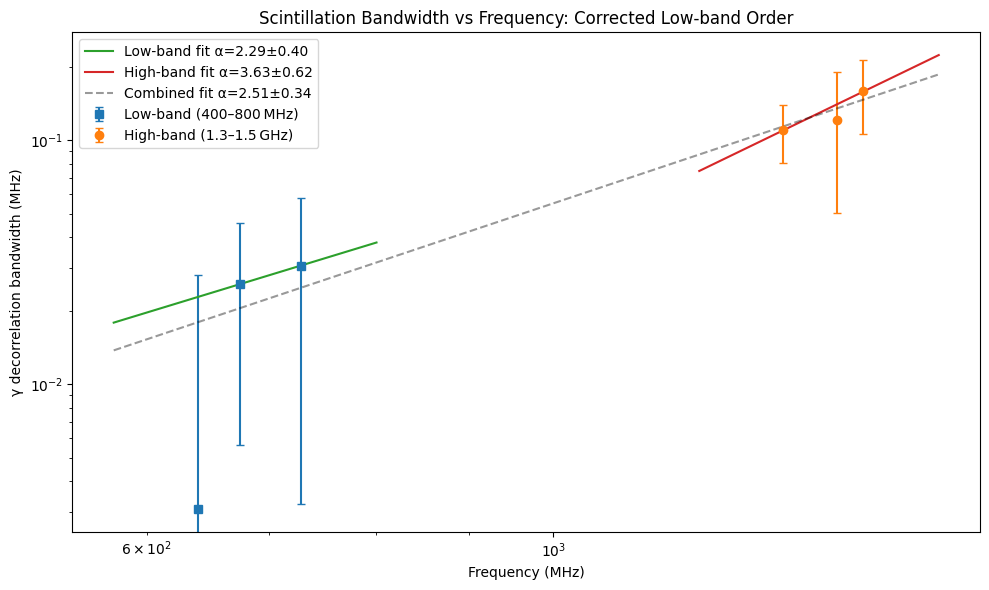

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# High‑band (unchanged)
freq_high = np.array([1334.68, 1428.44, 1475.32])
gamma_high = np.array([0.1098, 0.1203, 0.1595])
sigma_high = np.array([0.0294, 0.0698, 0.0536])

# Corrected low‑band: reverse the original order
freq_low = np.array([639.5791602472219, 674.4990322254934,
                     693.3742262989571, 727.977477196368])
gamma_low = np.array([0.00307364980666266, 0.025709408346127994,
                      0.08895984789247124, 0.030597509878495525])
sigma_low = np.array([0.024944904778742453, 0.02005131275943251,
                      np.nan, 0.027363149797342057])

# Drop NaN error point
valid = ~np.isnan(sigma_low)
freq_low, gamma_low, sigma_low = freq_low[valid], gamma_low[valid], sigma_low[valid]

def loglog_fit(nu, g, gerr):
    log_nu = np.log10(nu)
    log_g = np.log10(g)
    sigma_log = gerr / (g * np.log(10))
    w = 1 / sigma_log**2
    coeffs, cov = np.polyfit(log_nu, log_g, 1, w=w, cov=True)
    slope, intercept = coeffs
    slope_err = np.sqrt(cov[0, 0])
    return slope, slope_err, intercept

alpha_low, err_low, a_low = loglog_fit(freq_low, gamma_low, sigma_low)
alpha_high, err_high, a_high = loglog_fit(freq_high, gamma_high, sigma_high)

freq_all = np.hstack([freq_low, freq_high])
gamma_all = np.hstack([gamma_low, gamma_high])
sigma_all = np.hstack([sigma_low, sigma_high])
alpha_all, err_all, a_all = loglog_fit(freq_all, gamma_all, sigma_all)

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(freq_low, gamma_low, yerr=sigma_low, fmt='s', capsize=3, label='Low‑band (400–800 MHz)')
ax.errorbar(freq_high, gamma_high, yerr=sigma_high, fmt='o', capsize=3, label='High‑band (1.3–1.5 GHz)')

nu_low = np.linspace(freq_low.min()*0.9, freq_low.max()*1.1, 200)
nu_high = np.linspace(freq_high.min()*0.9, freq_high.max()*1.1, 200)
nu_all = np.linspace(freq_all.min()*0.9, freq_all.max()*1.1, 400)

ax.plot(nu_low, 10**(a_low + alpha_low*np.log10(nu_low)), '-', label=f'Low‑band fit α={alpha_low:.2f}±{err_low:.2f}')
ax.plot(nu_high, 10**(a_high + alpha_high*np.log10(nu_high)), '-', label=f'High‑band fit α={alpha_high:.2f}±{err_high:.2f}')
ax.plot(nu_all, 10**(a_all + alpha_all*np.log10(nu_all)), 'k--', alpha=0.4, label=f'Combined fit α={alpha_all:.2f}±{err_all:.2f}')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ decorrelation bandwidth (MHz)')
ax.set_title('Scintillation Bandwidth vs Frequency: Corrected Low‑band Order')
ax.legend()
plt.tight_layout()

(alpha_low, err_low, alpha_high, err_high, alpha_all, err_all)


(2.287775973609587,
 0.40030757023706376,
 3.6328238413851226,
 0.6168408522176745,
 2.510364135561717,
 0.3362389343523798)

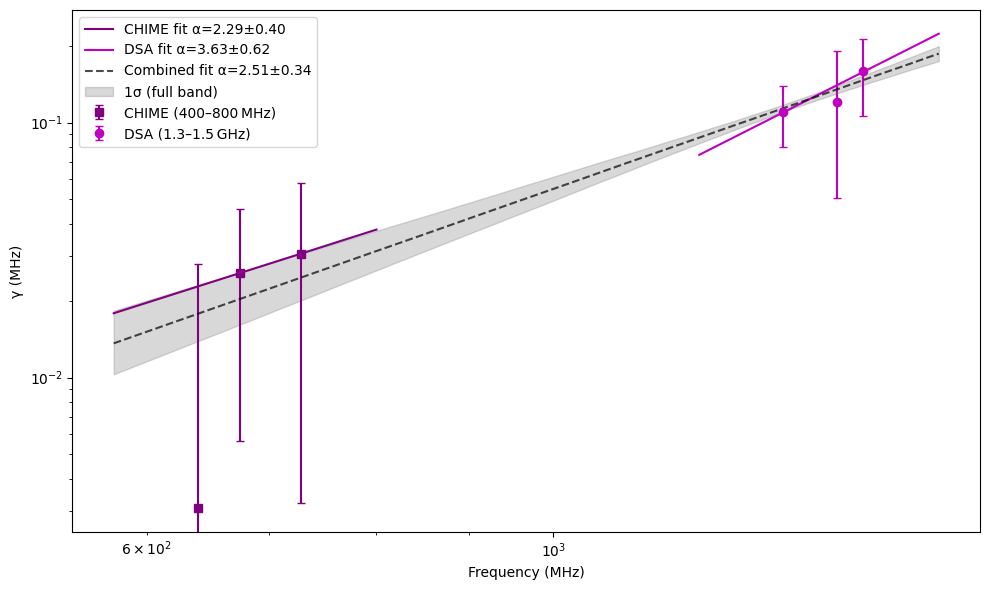

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data as given ---
freq_high = np.array([1334.68, 1428.44, 1475.32])
gamma_high = np.array([0.1098, 0.1203, 0.1595])
sigma_high = np.array([0.0294, 0.0698, 0.0536])

freq_low = np.array([639.5791602472219, 674.4990322254934,
                     693.3742262989571, 727.977477196368])
gamma_low = np.array([0.00307364980666266, 0.025709408346127994,
                      0.08895984789247124, 0.030597509878495525])
sigma_low = np.array([0.024944904778742453, 0.02005131275943251,
                      np.nan, 0.027363149797342057])

# Drop NaN
mask = ~np.isnan(sigma_low)
freq_low, gamma_low, sigma_low = freq_low[mask], gamma_low[mask], sigma_low[mask]

# Helper to fit log–log weighted
def wls_loglog(nu, g, gerr):
    log_nu = np.log10(nu)
    log_g = np.log10(g)
    sigma_log_g = gerr / (g * np.log(10))
    weights = 1 / sigma_log_g**2
    coeffs, cov = np.polyfit(log_nu, log_g, 1, w=weights, cov=True)
    slope, intercept = coeffs
    return slope, intercept, cov

alpha_low, a_low, cov_low = wls_loglog(freq_low, gamma_low, sigma_low)
alpha_high, a_high, cov_high = wls_loglog(freq_high, gamma_high, sigma_high)

freq_all = np.hstack([freq_low, freq_high])
gamma_all = np.hstack([gamma_low, gamma_high])
sigma_all = np.hstack([sigma_low, sigma_high])
alpha_all, a_all, cov_all = wls_loglog(freq_all, gamma_all, sigma_all)

alpha_low_err = np.sqrt(cov_low[0,0])
alpha_high_err = np.sqrt(cov_high[0,0])
alpha_all_err = np.sqrt(cov_all[0,0])

# --- Build uncertainty band for combined fit ---
nu_fit = np.linspace(freq_all.min()*0.9, freq_all.max()*1.1, 500)
log_nu_fit = np.log10(nu_fit)

# Draw samples of slope+intercept from covariance
rng = np.random.default_rng(12345)
samples = rng.multivariate_normal([alpha_all, a_all], cov_all, size=2000)
log_gamma_draws = samples[:,0][:,None]*log_nu_fit + samples[:,1][:,None]
gamma_draws = 10**log_gamma_draws
median = np.median(gamma_draws, axis=0)
lower = np.percentile(gamma_draws, 16, axis=0)
upper = np.percentile(gamma_draws, 84, axis=0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10,6))

# Data
ax.errorbar(freq_low, gamma_low, yerr=sigma_low, fmt='s', capsize=3, c='purple',
            label='CHIME (400–800 MHz)')
ax.errorbar(freq_high, gamma_high, yerr=sigma_high, fmt='o', capsize=3, c='m',
            label='DSA (1.3–1.5 GHz)')

# Low-band and high-band fit lines
nu_low = np.linspace(freq_low.min()*0.9, freq_low.max()*1.1, 200)
nu_high = np.linspace(freq_high.min()*0.9, freq_high.max()*1.1, 200)
ax.plot(nu_low, 10**(a_low + alpha_low*np.log10(nu_low)), c='purple',
        label=f'CHIME fit α={alpha_low:.2f}±{alpha_low_err:.2f}')
ax.plot(nu_high, 10**(a_high + alpha_high*np.log10(nu_high)), c='m',
        label=f'DSA fit α={alpha_high:.2f}±{alpha_high_err:.2f}')

# Combined fit line and 1σ shaded region
ax.plot(nu_fit, median, 'k--', alpha=0.7,
        label=f'Combined fit α={alpha_all:.2f}±{alpha_all_err:.2f}')
ax.fill_between(nu_fit, lower, upper, color='grey', alpha=0.3,
                label='1σ (full band)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ (MHz)')#
#ax.set_title('Wilhelm')
ax.legend()
plt.tight_layout()

(alpha_low, alpha_low_err,
 alpha_high, alpha_high_err,
 alpha_all, alpha_all_err)


(8.502456613544723,
 10.88467240614406,
 6.80042821556026,
 2.1350276586999284,
 6.662237742869245,
 0.7209613493320396)

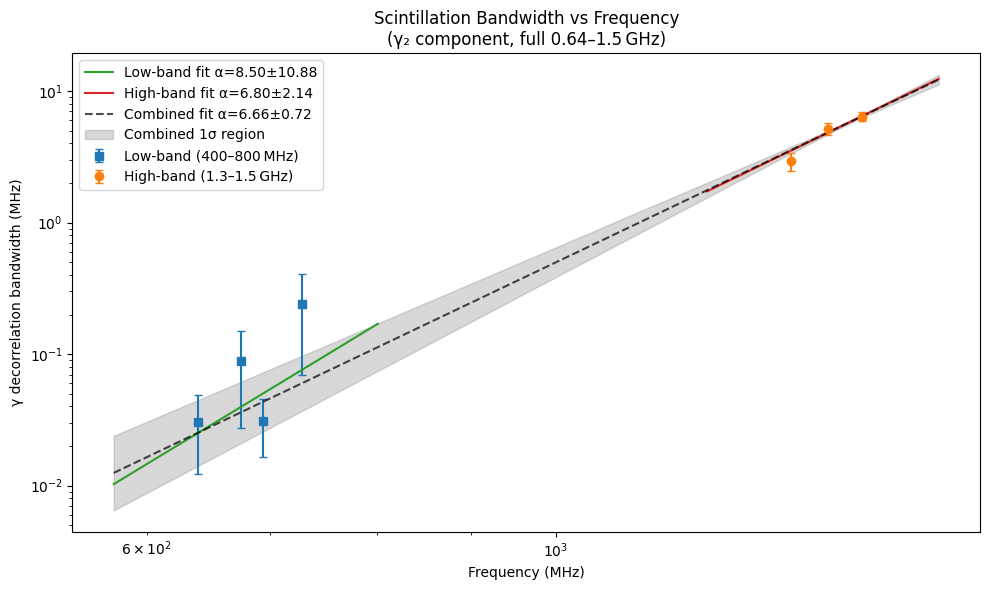

In [82]:
import numpy as np
import matplotlib.pyplot as plt

freq_high = np.array([1342.49, 1405.00, 1467.51])
gamma_high = np.array([2.9251, 5.1510, 6.3992])
sigma_high = np.array([0.4747, 0.5412, 0.5077])

#freq_high = np.array([1475.32, 1428.44, 1381.56, 1334.68])
#gamma_high = np.array([9.4793, 2.098, 1.06, 4.08])
#sigma_high = np.array([0.4386, 0.2805, 0.2829, 0.4377])

# Low‑band values
freq_low = np.array([727.977477196368, 693.3742262989571,
                     674.4990322254934, 639.5791602472219])
gamma_low = np.array([0.239177755414001, 0.03098038269728807,
                      0.08902349045914636, 0.03060903481854996])
sigma_low = np.array([0.16924869256962413, 0.014594476244811576,
                      0.06139504876062839, 0.01827234228783935])

# ==== Weighted log–log fit helper ====
def wls_loglog(nu, g, gerr):
    log_nu = np.log10(nu)
    log_g = np.log10(g)
    sigma_log_g = gerr / (g * np.log(10))
    w = 1 / sigma_log_g**2
    coeffs, cov = np.polyfit(log_nu, log_g, 1, w=w, cov=True)
    slope, intercept = coeffs
    slope_err = np.sqrt(cov[0, 0])
    return slope, intercept, slope_err, cov

# Band‑limited fits
alpha_high, a_high, err_high, cov_high = wls_loglog(freq_high, gamma_high, sigma_high)
alpha_low,  a_low,  err_low,  cov_low  = wls_loglog(freq_low,  gamma_low,  sigma_low)

# Combined fit
freq_all   = np.hstack([freq_low,  freq_high])
gamma_all  = np.hstack([gamma_low, gamma_high])
sigma_all  = np.hstack([sigma_low, sigma_high])
alpha_all, a_all, err_all, cov_all = wls_loglog(freq_all, gamma_all, sigma_all)

# === Uncertainty band for combined fit ===
nu_grid = np.linspace(freq_all.min()*0.9, freq_all.max()*1.1, 600)
log_nu_grid = np.log10(nu_grid)

# Monte‑Carlo draws from slope/intercept covariance
rng = np.random.default_rng(20240627)
samples = rng.multivariate_normal([alpha_all, a_all], cov_all, size=3000)
log_gamma_draws = samples[:, 0][:, None] * log_nu_grid + samples[:, 1][:, None]
gamma_draws = 10**log_gamma_draws

median = np.median(gamma_draws, axis=0)
lower  = np.percentile(gamma_draws, 16, axis=0)
upper  = np.percentile(gamma_draws, 84, axis=0)

# === Plot ===
fig, ax = plt.subplots(figsize=(10, 6))

# Data points
ax.errorbar(freq_low,  gamma_low,  yerr=sigma_low,  fmt='s', capsize=3,
            label='Low‑band (400–800 MHz)')
ax.errorbar(freq_high, gamma_high, yerr=sigma_high, fmt='o', capsize=3,
            label='High‑band (1.3–1.5 GHz)')

# Fit lines
nu_low  = np.linspace(freq_low.min()*0.9,  freq_low.max()*1.1, 200)
nu_high = np.linspace(freq_high.min()*0.9, freq_high.max()*1.1, 200)

ax.plot(nu_low,  10**(a_low  + alpha_low *np.log10(nu_low)),
        '-', label=f'Low‑band fit α={alpha_low:.2f}±{err_low:.2f}')
ax.plot(nu_high, 10**(a_high + alpha_high*np.log10(nu_high)),
        '-', label=f'High‑band fit α={alpha_high:.2f}±{err_high:.2f}')

# Combined fit with shaded 1σ region
ax.plot(nu_grid, median, 'k--', alpha=0.7,
        label=f'Combined fit α={alpha_all:.2f}±{err_all:.2f}')
ax.fill_between(nu_grid, lower, upper, color='grey', alpha=0.3,
                label='Combined 1σ region')

# Axes & cosmetics
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ decorrelation bandwidth (MHz)')
ax.set_title('Scintillation Bandwidth vs Frequency\n(γ₂ component, full 0.64–1.5 GHz)')
ax.legend()
plt.tight_layout()

(alpha_low, err_low, alpha_high, err_high, alpha_all, err_all)


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10

# High‑band subset (2 points)
#freq_high = np.array([1475.32, 1334.68])
#gamma_high = np.array([9.4793, 4.08])
#sigma_high = np.array([0.4386, 0.4377])
freq_high = np.array([1475.32, 1428.44, 1381.56, 1334.68])
gamma_high = np.array([9.4793, 2.098, 1.06, 4.08])
sigma_high = np.array([0.4386, 0.2805, 0.2829, 0.4377])

# Low‑band data
freq_low = np.array([727.977477196368, 693.3742262989571,
                     674.4990322254934, 639.5791602472219])
gamma_low = np.array([0.239177755414001, 0.03098038269728807,
                      0.08902349045914636, 0.03060903481854996])
sigma_low = np.array([0.16924869256962413, 0.014594476244811576,
                      0.06139504876062839, 0.01827234228783935])

# Simple OLS for >=3 points
def ols_loglog(nu, g):
    log_nu = np.log10(nu)
    log_g = np.log10(g)
    coeffs, cov = np.polyfit(log_nu, log_g, 1, cov=True)
    slope, intercept = coeffs
    slope_err = np.sqrt(cov[0,0])
    return slope, intercept, slope_err, cov

# two‑point line (no covariance)
def two_point_loglog(nu, g):
    x1, x2 = np.log10(nu)
    y1, y2 = np.log10(g)
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

alpha_high, a_high = two_point_loglog(freq_high, gamma_high)
err_high = np.nan

alpha_low, a_low, err_low, cov_low = ols_loglog(freq_low, gamma_low)

# Combined fit using all 6 points (cov ok)
freq_all = np.hstack([freq_low, freq_high])
gamma_all = np.hstack([gamma_low, gamma_high])
alpha_all, a_all, err_all, cov_all = ols_loglog(freq_all, gamma_all)

# Uncertainty band from combined cov
nu_grid = np.linspace(freq_all.min()*0.9, freq_all.max()*1.1, 600)
log_nu_grid = np.log10(nu_grid)
rng = np.random.default_rng(321)
samples = rng.multivariate_normal([alpha_all, a_all], cov_all, size=3000)
log_gamma_draws = samples[:,0][:,None] * log_nu_grid + samples[:,1][:,None]
gamma_draws = 10**log_gamma_draws
median = np.median(gamma_draws, axis=0)
lower = np.percentile(gamma_draws, 16, axis=0)
upper = np.percentile(gamma_draws, 84, axis=0)

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(freq_low, gamma_low, yerr=sigma_low, fmt='s', capsize=3, c='m',
            label='Low‑band (400–800 MHz)')
ax.errorbar(freq_high, gamma_high, yerr=sigma_high, fmt='o', capsize=3,c='purple',
            label='High‑band subset (1.3–1.5 GHz)')

nu_low = np.linspace(freq_low.min()*0.9, freq_low.max()*1.1, 200)
nu_high = np.linspace(freq_high.min()*0.9, freq_high.max()*1.1, 200)
ax.plot(nu_low, 10**(a_low + alpha_low*np.log10(nu_low)),
        c='m', label=f'Low‑band fit α={alpha_low:.2f}±{err_low:.2f}')
ax.plot(nu_high, 10**(a_high + alpha_high*np.log10(nu_high)),
        c='purple', label=f'High‑band fit α={alpha_high:.2f} (2‑pt)')

ax.plot(nu_grid, median, 'k--', alpha=0.7,
        label=f'Combined fit α={alpha_all:.2f}±{err_all:.2f}')
ax.fill_between(nu_grid, lower, upper, color='grey', alpha=0.3,
                label='Combined 1σ region')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('γ₂ decorrelation bandwidth (MHz)')
ax.set_title('Scintillation Bandwidth vs Frequency\n(γ₂ component, high-band subset)')
ax.legend()
plt.tight_layout()

(alpha_low, err_low, alpha_high, alpha_all, err_all)


ValueError: too many values to unpack (expected 2)